# RNN Cell Size Analysis

This notebook analyzes the effect of different RNN cell sizes on model performance.

## Import Library

In [432]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [433]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [434]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Reset Seed Function for A Fair Comparison

In [435]:
def reset_seeds(seed=42):
    import random as python_random
    import numpy as np
    import tensorflow as tf

    python_random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


## Model Training

Variants:
1. 32 Cells per layer
2. 64 Cells per layer
3. 128 Cells per layer

In [436]:
EPOCHS = 10
BATCH_SIZE = 128

### Variant 1: 32 Cells per layer

In [437]:
reset_seeds()
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
)

Epoch 1/10


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3367 - loss: 1.1271 - val_accuracy: 0.3600 - val_loss: 1.0744
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5917 - loss: 0.9836 - val_accuracy: 0.4100 - val_loss: 1.0717
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8294 - loss: 0.8409 - val_accuracy: 0.4300 - val_loss: 1.0628
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9193 - loss: 0.6586 - val_accuracy: 0.4100 - val_loss: 1.0614
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9779 - loss: 0.4777 - val_accuracy: 0.4500 - val_loss: 1.0722
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.3368 - val_accuracy: 0.4300 - val_loss: 1.0854
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.2339 - val_accuracy: 0.4500 - val_loss: 1.0990
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1761 - val_accuracy: 0.4200 - val_loss: 1.1321
Epoch 9/10


### Variant 2: 64 Cells per layer

In [438]:
reset_seeds()
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3200 - loss: 1.1124 - val_accuracy: 0.4500 - val_loss: 1.0701
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7357 - loss: 0.9205 - val_accuracy: 0.5100 - val_loss: 0.9997
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8167 - loss: 0.6980 - val_accuracy: 0.5100 - val_loss: 1.0232
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9178 - loss: 0.5028 - val_accuracy: 0.6200 - val_loss: 0.9350
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9806 - loss: 0.3213 - val_accuracy: 0.6300 - val_loss: 0.9626
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9979 - loss: 0.2080 - val_accuracy: 0.6300 - val_loss: 0.9426
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1376 - val_accuracy: 0.6300 - val_loss: 0.9241
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0913 - val_accuracy: 0.6000 - val_loss: 0.9874


### Varian 3: 128 Cells per layer

In [439]:
reset_seeds()
model_3 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(128),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2949 - loss: 1.1415 - val_accuracy: 0.4000 - val_loss: 1.0720
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6115 - loss: 0.9716 - val_accuracy: 0.5300 - val_loss: 0.9889
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8038 - loss: 0.6779 - val_accuracy: 0.5300 - val_loss: 0.9647
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9246 - loss: 0.3707 - val_accuracy: 0.5400 - val_loss: 0.9545
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9814 - loss: 0.1939 - val_accuracy: 0.6100 - val_loss: 0.9085
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9950 - loss: 0.1019 - val_accuracy: 0.6800 - val_loss: 0.9237
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0428 - val_accuracy: 0.5600 - val_loss: 0.9695
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0253 - val_accuracy: 0.5400 - val_loss: 1.1584


## Model Evaluation

In [440]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (32 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.52      0.42      0.46        38
           1       0.40      0.58      0.47        24
           2       0.32      0.29      0.31        38

    accuracy                           0.41       100
   macro avg       0.41      0.43      0.41       100
weighted avg       0.42      0.41      0.41       100

Macro F1-score: 0.4146


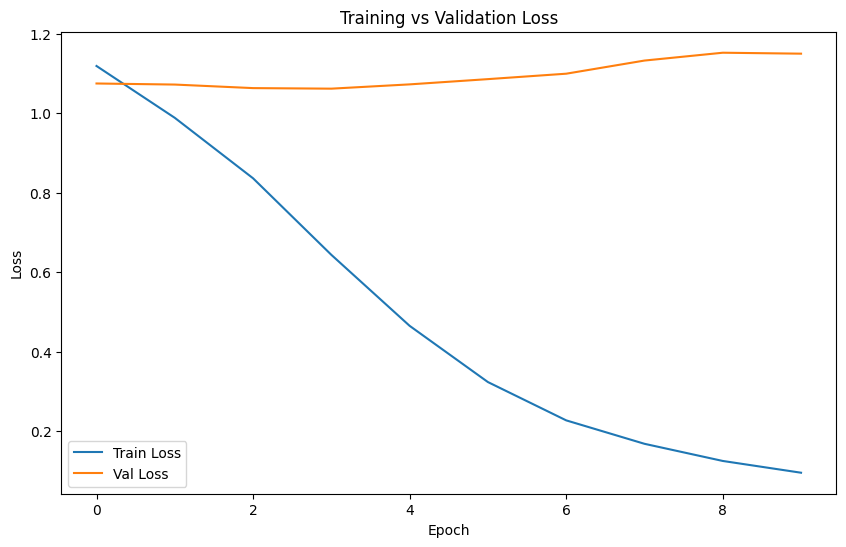

In [441]:
print("\nEvaluating Model 1 (32 cells per layer):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (64 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        38
           1       0.46      0.46      0.46        24
           2       0.67      0.63      0.65        38

    accuracy                           0.62       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.62      0.62      0.62       100

Macro F1-score: 0.5998


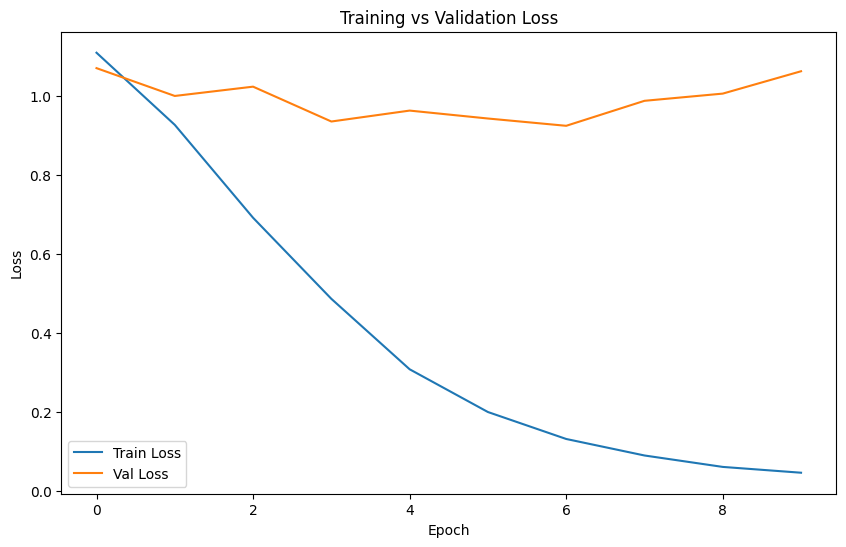

In [442]:
print("\nEvaluating Model 2 (64 cells per layer):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

#### Model 3


Evaluating Model 3 (128 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        38
           1       0.55      0.50      0.52        24
           2       0.64      0.74      0.68        38

    accuracy                           0.64       100
   macro avg       0.63      0.62      0.62       100
weighted avg       0.64      0.64      0.64       100

Macro F1-score: 0.6238


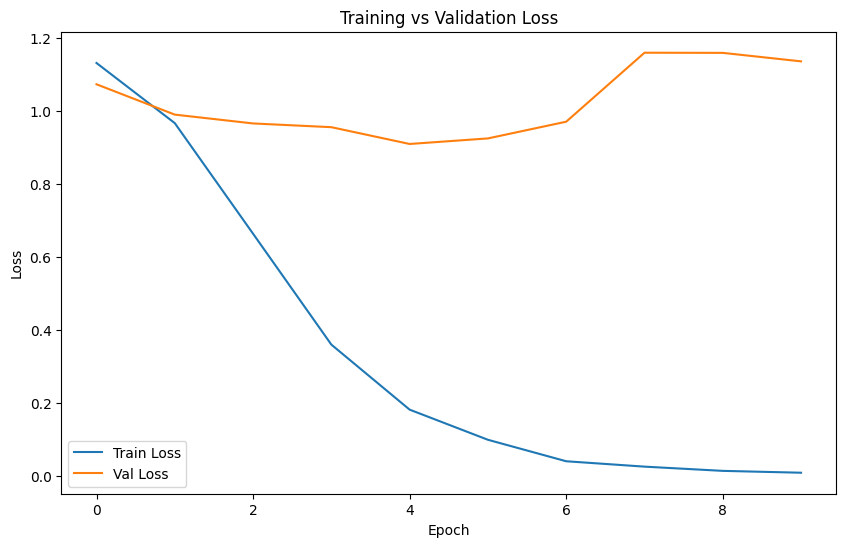

In [443]:
print("\nEvaluating Model 3 (128 cells per layer):")
f1_3 = evaluate_model(model_3, x_val, y_val, history_3)

### Validation Loss Comparison

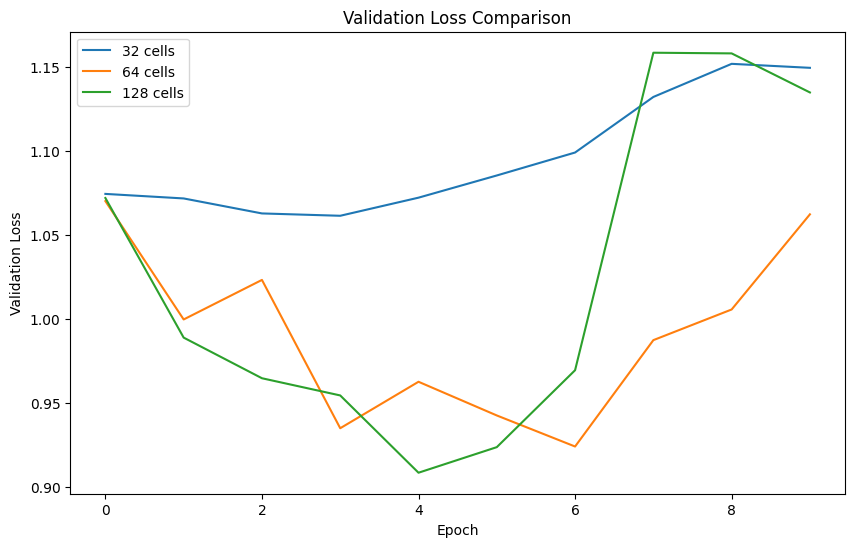

In [444]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='32 cells')
plt.plot(history_2.history['val_loss'], label='64 cells')
plt.plot(history_3.history['val_loss'], label='128 cells')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

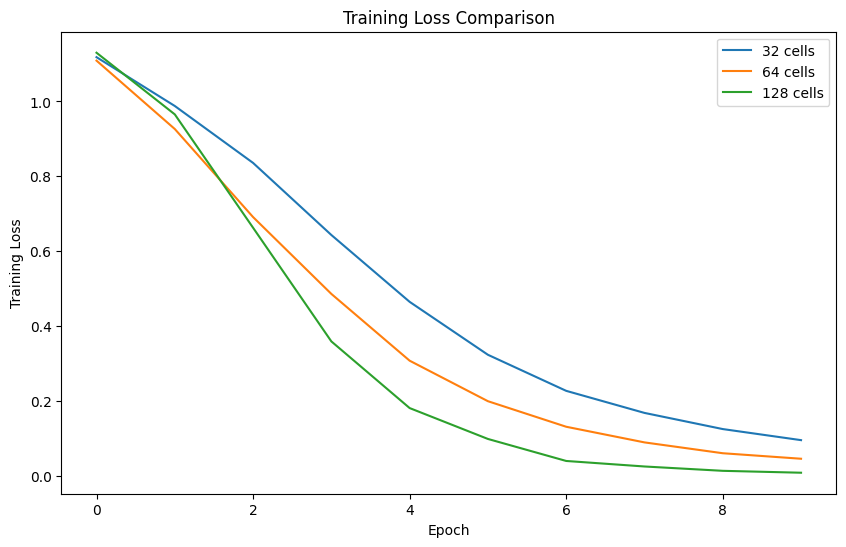

In [445]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='32 cells')
plt.plot(history_2.history['loss'], label='64 cells')
plt.plot(history_3.history['loss'], label='128 cells')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

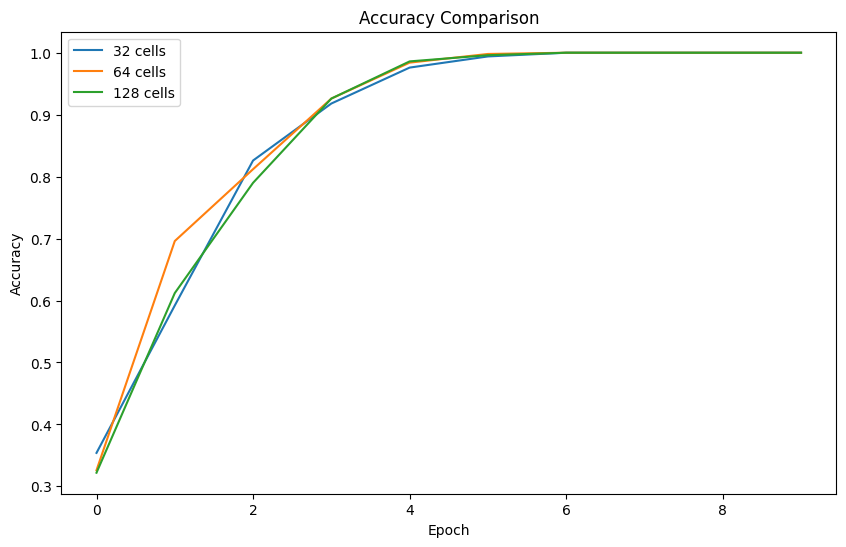

In [446]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='32 cells')
plt.plot(history_2.history['accuracy'], label='64 cells')
plt.plot(history_3.history['accuracy'], label='128 cells')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

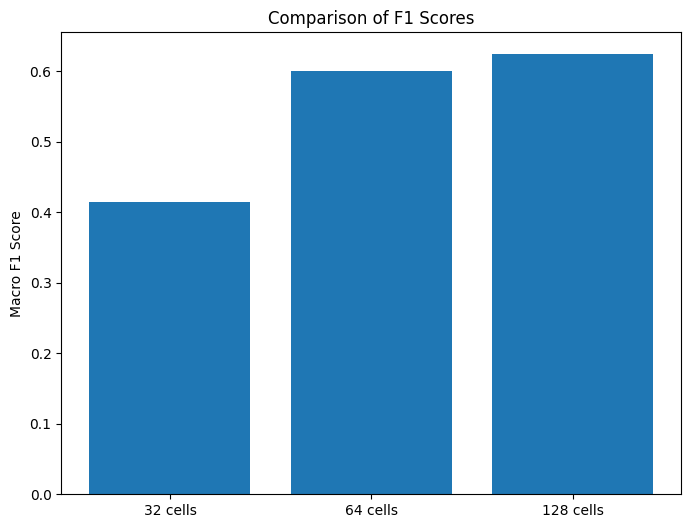

In [447]:
plt.figure(figsize=(8, 6))
plt.bar(['32 cells', '64 cells', '128 cells'], [f1_1, f1_2, f1_3])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()